<a href="https://colab.research.google.com/github/drmurtazakhan/Python/blob/main/Sqlite_Python_DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import data analysis libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
# Establish connection with database TRADE_DB
connection = sqlite3.connect("TRADE_DB");

In [3]:
# Read data from the 'ITEM' table in the database into a pandas dataframe.
df = pd.read_sql_query("SELECT * FROM ITEM", connection)

# print dataframe without index
print(df.to_string(index=False))

ItemCode PurchaseDate   ItemName  ItemPrice    Category
       1   2024-09-27      Pizza        2.0        Food
       2   2024-09-27      Bread        0.5        Food
       3   2024-09-28      Apple        1.0        Food
       4   2024-09-28     Banana        0.5        Food
       5   2024-09-28      Mango        1.0        Food
       6   2024-09-29        Pen        1.0  Stationary
       7   2024-09-29   Notebook        2.0  Stationary
       8   2024-09-30    Markers        1.0  Stationary
       9   2024-10-01      Chair        2.0   Furniture
      10   2024-10-01      Table        3.0   Furniture
      11   2024-10-02   Keyboard        2.0 Electronics
      12   2024-10-02      Mouse        2.0 Electronics
      13   2024-10-03 Calculator        1.0 Electronics
      14  22024-10-03 USB Memory        1.0 Electronics


In [4]:
# Calculate and print descriptive statistics for ItemPrice column.
countRecords = len(df)
print ("Number of items = %d" % (countRecords))

sumPrice = df['ItemPrice'].sum()
print ("Sum of ItemPrice = %.2f" % (sumPrice))

avgPrice = df['ItemPrice'].mean()
print("Avg. of ItemPrice = %.2f" % (avgPrice))

minPrice = df['ItemPrice'].min()
print("Min. of ItemPrice = %.2f" % (minPrice))

maxPrice = df['ItemPrice'].max()
print("Max. of ItemPrice = %.2f" % (maxPrice))

Number of items = 14
Sum of ItemPrice = 20.00
Avg. of ItemPrice = 1.43
Min. of ItemPrice = 0.50
Max. of ItemPrice = 3.00


In [5]:
# Grouping basedon Category column
grouped = df.groupby('Category')

In [6]:
# Aggregate the data in each category by count of ItemName
itemCountByCategory = grouped.agg({'ItemName': 'count'})
print(itemCountByCategory)

             ItemName
Category             
Electronics         4
Food                5
Furniture           2
Stationary          3


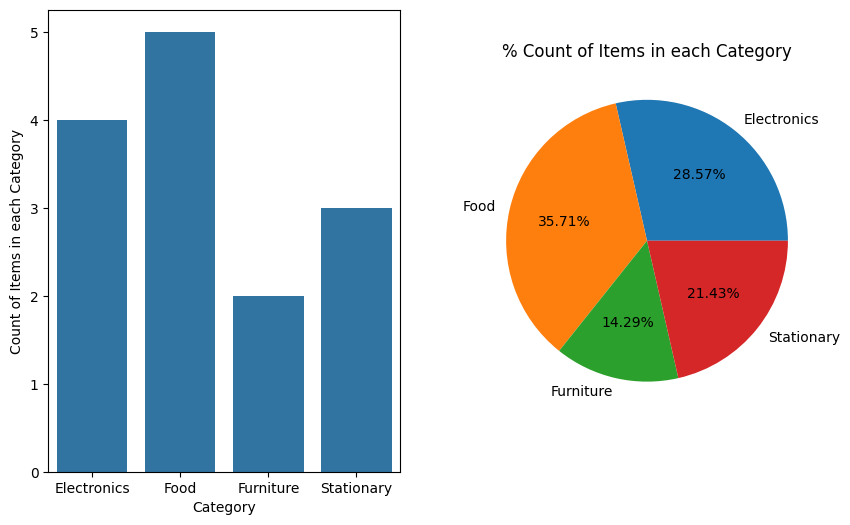

In [7]:
# Create a figure and a set of subplots.
plt.figure(figsize=(10, 6)) # Set the figure size (width, height) in inches.

# Create the first subplot (1 row, 2 columns, first subplot).
plt.subplot(1, 2, 1)
# Create a bar plot using Seaborn.
ax = sns.barplot(x='Category', y='ItemName', data=itemCountByCategory)
plt.xlabel("Category") # Set the label for the x-axis.
plt.ylabel("Count of Items in each Category") # Set the label for the y-axis.

# Create the second subplot (1 row, 2 columns, second subplot).
plt.subplot(1, 2, 2)
# Create a pie chart.
plt.pie(itemCountByCategory['ItemName'],
        labels=itemCountByCategory.index, autopct='%1.2f%%')
plt.title("% Count of Items in each Category") # Set the title of the pie chart.
plt.show(block=False) # Display the plots.


In [8]:
connection.close()